In [63]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
import operator
import matplotlib.pyplot as plt
data=pd.read_csv('Iris/iris.csv')
Errors = []

In [91]:
from numpy.linalg import norm
from numpy import dot

In [64]:
data,testdata= np.split(data,[int(0.80*len(data))])

In [65]:
def maxfreq(arrayd):
    c=Counter(arrayd)
    value,count= c.most_common()[0]
#     print("most common",value)
    return value    

In [66]:
def chebyshevdistance(datarow,testrow):
    dist=0
    for x in range(len(datarow.keys())-1):
        dist= max(dist,abs(datarow[datarow.keys()[x]]-testrow[testrow.keys()[x]]));

    return dist

In [94]:
def cosinedistance(x, y):
    x=np.array(x[0:-1])
    y=np.array(y[0:-1])
    return dot(x, y)/((norm(x))*norm(y))

In [75]:
def manhattandistance(datarow,testrow):
    dist=0
    for x in range(len(datarow.keys())-1):
        dist+= abs(datarow[datarow.keys()[x]]-testrow[testrow.keys()[x]]);

    return dist

In [69]:
def eucliddistance(datarow,testrow):
#     print("datarow", datarow)
#     print("testrow", testrow)
    dist=0
    for x in range(len(datarow.keys())-1):
#         print("values of both the rows",datarow[datarow.keys()[x]],testrow[testrow.keys()[x]])
        dist+= math.pow(datarow[datarow.keys()[x]]-testrow[testrow.keys()[x]],2);
#         print("dist",dist)
    
    dist= math.sqrt(dist)
    return dist

In [97]:
def finddistances(data,testdata,k):
    global correct
    global wrong
    correct=0
    wrong=0
    for x in range(len(testdata)):
        distancevector=[]
        for y in range(len(data)):
#             print(data.iloc[y],testdata.iloc[x])
            dist= eucliddistance(data.iloc[y],testdata.iloc[x])
            datarow = data.iloc[y]
            distancevector.append((dist,datarow[datarow.keys()[-1]]))
        
#         print(distancevector)
        sorted_d = sorted(distancevector)
#         print(sorted_d)
        i=0
        arrayd=[]
        
        for key in sorted_d:
            if i==k:
                break
            arrayd.append(key[1])
            i+=1
        

      
        predictedlabel = maxfreq(arrayd)
        predictions.append(predictedlabel)
        
        if predictedlabel== list(testdata.iloc[x])[-1]:
            correct+=1
        else:
            wrong+=1
    
    actual = np.array(testdata.iloc[:,-1])
    p,r,f,none = precision_recall_fscore_support(actual,predictions, average='macro')
    
    return correct/(wrong+correct),p,r,f

In [98]:
ylabel=[]
xlabel=[]
correct=0
wrong=0
A=[]
P=[]
F=[]
R=[]
for x in range(3, int(math.sqrt(len(data)))):
    predictions=[]
    actual=[]
    accuracy,p,r,f=finddistances(data,testdata,x)
    A.append(accuracy)
    P.append(p)
    F.append(f)
    R.append(r)
    ylabel.append(accuracy)
    xlabel.append(x)

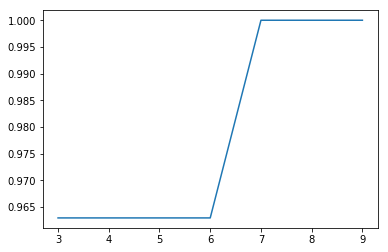

In [99]:
plt.plot(xlabel, ylabel)

plt.show()


In [100]:
# print(len(data))
# print(len(testdata))
# finddistances(data, testdata, 10)
print(ylabel)

[0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 1.0, 1.0, 1.0]


In [101]:
Errors.append(ylabel)

In [49]:
P

[0.9523809523809524,
 0.9523809523809524,
 0.9523809523809524,
 0.9523809523809524,
 0.9523809523809524,
 0.9523809523809524,
 1.0]

In [102]:
Errors

[[0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  1.0],
 [0.9629629629629629,
  0.9629629629629629,
  0.9259259259259259,
  0.9259259259259259,
  0.9259259259259259,
  0.9259259259259259,
  0.9629629629629629],
 [0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  1.0,
  1.0,
  1.0]]

In [1]:
plt.plot(xlabel, Errors[0])
plt.plot(xlabel, Errors[1])
plt.plot(xlabel, Errors[2])

plt.show()


NameError: name 'plt' is not defined